In [32]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns 
from collections import Counter
plt.style.use("seaborn") # Plot style
# allows to output plots in the notebook
%matplotlib inline 
# makes inline plots to have better quality
%config InlineBackend.figure_format = 'svg'

In [33]:
test_data = pd.read_csv('train.csv')

In [34]:
test_data.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969


In [35]:
def preprocess_data(data):
    result = data.fillna(0)
    return result

In [36]:
data = preprocess_data(test_data)
data.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,0.0,0.0,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,0.0,0.0,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,0.0,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,0.0,0.0,7969


In [37]:
data.shape

(550068, 12)

In [38]:
data.describe()

,User_ID,Occupation,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
count,5.500680e+05,550068.000000,550068.000000,550068.000000,550068.000000,550068.000000,550068.000000
mean,1.003029e+06,8.076707,0.409653,5.404270,6.735436,3.841941,9263.968713
std,1.727592e+03,6.522660,0.491770,3.936211,6.215492,6.250712,5023.065394
min,1.000001e+06,0.000000,0.000000,1.000000,0.000000,0.000000,12.000000
25%,1.001516e+06,2.000000,0.000000,1.000000,0.000000,0.000000,5823.000000
50%,1.003077e+06,7.000000,0.000000,5.000000,5.000000,0.000000,8047.000000
75%,1.004478e+06,14.000000,1.000000,8.000000,14.000000,8.000000,12054.000000
max,1.006040e+06,20.000000,1.000000,20.000000,18.000000,18.000000,23961.000000


### Gender and purchasing power

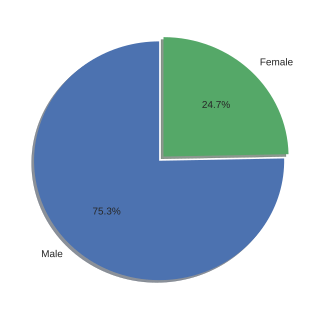

In [47]:
fig, ax = plt.subplots(figsize=(5,5.5))
ax.pie(data.Gender.value_counts(),explode=(0.05,0),labels=['Male','Female'], autopct='%1.1f%%',
        shadow=True, startangle=90)
plt.show()

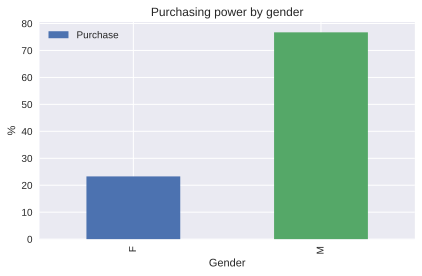

In [48]:
sum_by_gender = data.groupby('Gender')['Purchase'].sum().sort_values()
sum_all_purchases = data['Purchase'].sum()
percent_by_gender = round((sum_by_gender/sum_all_purchases)*100,2)
percent_by_gender.plot('bar')
plt.title('Purchasing power by gender')
plt.ylabel('%')
plt.legend()
plt.show()

### Age and purchasing power

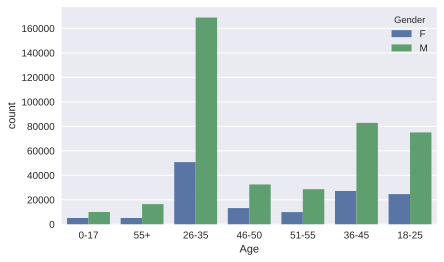

In [49]:
sns.countplot(data['Age'],hue=data['Gender'])
plt.show()

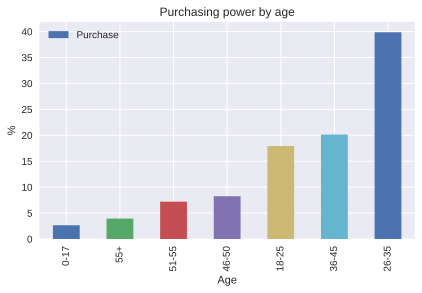

In [50]:
sum_by_age = data.groupby('Age')['Purchase'].sum().sort_values()
sum_all_purchases = data['Purchase'].sum()
percent_by_age = round((sum_by_age/sum_all_purchases)*100,2)
percent_by_age.plot('bar')
plt.title('Purchasing power by age')
plt.ylabel('%')
plt.legend()
plt.show()

### City

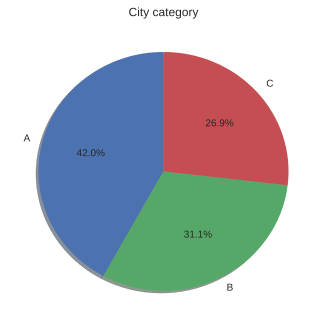

In [52]:
fig, ax = plt.subplots(figsize=(5,5.5))
ax.pie(data.City_Category.value_counts(),labels=['A','B','C'], autopct='%1.1f%%',
        shadow=True, startangle=90)
ax.set_title('City category')
plt.show()

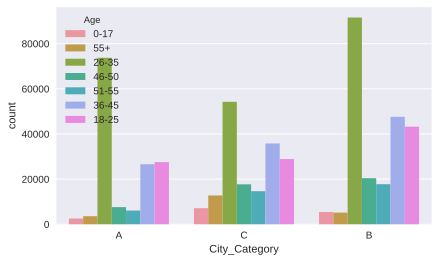

In [53]:
sns.countplot(data['City_Category'],hue=data['Age'])
plt.show()

### Stay in current city

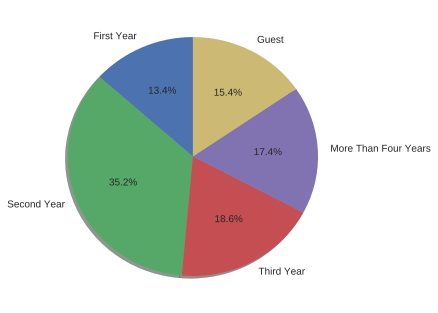

In [55]:
labels=['First Year','Second Year','Third Year','More Than Four Years','Guest']
fig, ax = plt.subplots(figsize=(5,5.5))
ax.pie(data.groupby('Stay_In_Current_City_Years')['Purchase'].sum(), labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
plt.show()